<a href="https://colab.research.google.com/github/gayathriviji/prodigy-infotech/blob/main/prodigyt1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler,QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

%matplotlib inline

train dataframe

In [40]:
traindf = pd.read_csv('/content/train.csv')

In [5]:
traindf.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
numeric_df = traindf.select_dtypes(include='number')
correlation_matrix  = numeric_df.corr()
correlation_matrix['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [7]:
req_tr = ["GarageArea","SalePrice","OverallQual","TotalBsmtSF","1stFlrSF","2ndFlrSF","LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath", "HalfBath"] # Add 'FullBath' and 'HalfBath' to the list of required columns
selected_tr = traindf[req_tr]

selected_tr.loc[:,'TotalBath'] = (selected_tr['BsmtFullBath'].fillna(0) +
                                selected_tr['BsmtHalfBath'].fillna(0) + # Change the second 'BsmtFullBath' to 'BsmtHalfBath'
                                selected_tr['FullBath'].fillna(0) +
                                selected_tr['HalfBath'].fillna(0))

selected_tr.loc[:,'TotalSF'] = (selected_tr['TotalBsmtSF'].fillna(0)+
                                selected_tr['1stFlrSF'].fillna(0)+
                                selected_tr['2ndFlrSF'].fillna(0)+
                                selected_tr['LowQualFinSF'].fillna(0)+
                                selected_tr['GrLivArea'].fillna(0))

<ipython-input-7-d94f149ff68e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_tr.loc[:,'TotalBath'] = (selected_tr['BsmtFullBath'].fillna(0) +
<ipython-input-7-d94f149ff68e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_tr.loc[:,'TotalSF'] = (selected_tr['TotalBsmtSF'].fillna(0)+


In [8]:
selected_tr

,GarageArea,SalePrice,OverallQual,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,TotalBath,TotalSF
0,548,208500,7,856,856,854,0,1710,1,0,2,1,4,4276
1,460,181500,6,1262,1262,0,0,1262,0,1,2,0,3,3786
2,608,223500,7,920,920,866,0,1786,1,0,2,1,4,4492
3,642,140000,7,756,961,756,0,1717,1,0,1,0,2,4190
4,836,250000,8,1145,1145,1053,0,2198,1,0,2,1,4,5541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,460,175000,6,953,953,694,0,1647,0,0,2,1,3,4247
1456,500,210000,6,1542,2073,0,0,2073,1,0,2,0,3,5688
1457,252,266500,7,1152,1188,1152,0,2340,0,0,2,0,2,5832
1458,240,142125,5,1078,1078,0,0,1078,1,0,1,0,2,3234


necessary colunms

In [9]:
train_df = selected_tr[['TotalBsmtSF', 'TotalBath', 'GarageArea', 'TotalSF', 'OverallQual','SalePrice']] # Change the tuple to a list for selecting multiple columns

In [10]:
train_df

,TotalBsmtSF,TotalBath,GarageArea,TotalSF,OverallQual,SalePrice
0,856,4,548,4276,7,208500
1,1262,3,460,3786,6,181500
2,920,4,608,4492,7,223500
3,756,2,642,4190,7,140000
4,1145,4,836,5541,8,250000
...,...,...,...,...,...,...
1455,953,3,460,4247,6,175000
1456,1542,3,500,5688,6,210000
1457,1152,2,252,5832,7,266500
1458,1078,2,240,3234,5,142125


splitting the dataset and creating pipeline

In [11]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(train_df,test_size=0.2,random_state = 42)
print(f"Rows in train set:{len(train_set)}\nRows in test set:{len(test_set)}\n")

Rows in train set:1168
Rows in test set:292



In [12]:
housing=train_set.drop("SalePrice",axis=1)
housing_labels=train_set["SalePrice"].copy()

In [13]:
!pip install matplotlib-venn
!apt-get -qq install -y libfluidsynth1
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive


E: Package 'libfluidsynth1' has no installation candidate
Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 121925 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.6.0-1ubuntu1.1_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.6.0-1ubuntu1.1) ...
Setting up libarchive-dev:amd64 (3.6.0-1ubuntu1.1) ...
Processing triggers for man-db (2.10.2-1) ...
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 1.9 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for libarchive
  Running setup.py clean for libarchive
Failed to build libarchive
ERROR: Could not build wheels for libarchive, which is required to install pyproject.toml-based projects
  Using

In [14]:
!pip install cartopy
import cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 53.3 MB/s eta 0:00:00


In [15]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_Pipeline=Pipeline([('imputer',SimpleImputer(strategy="median")),
                      ('std_scaler',StandardScaler())
])

In [16]:
X_train=my_Pipeline.fit_transform(housing)

In [17]:
X_train

array([[ 0.57261219, -0.48377079, -0.86383727, -0.13352109, -0.82044456],
       [-0.59654659,  0.61127627, -0.45626397, -0.13428593, -0.08893368],
       [-0.60335723, -1.57881784, -2.25716927, -1.32207838, -0.82044456],
       ...,
       [-0.44898286, -0.48377079,  0.45366713, -1.16605156, -0.82044456],
       [-0.34001272, -0.48377079, -1.23349678, -0.26966215,  0.64257719],
       [ 0.70655466, -0.48377079,  0.87071888,  0.28025593,  0.64257719]])

In [18]:
Y_train=housing_labels

In [19]:
Y_train.shape

(1168,)

correlations

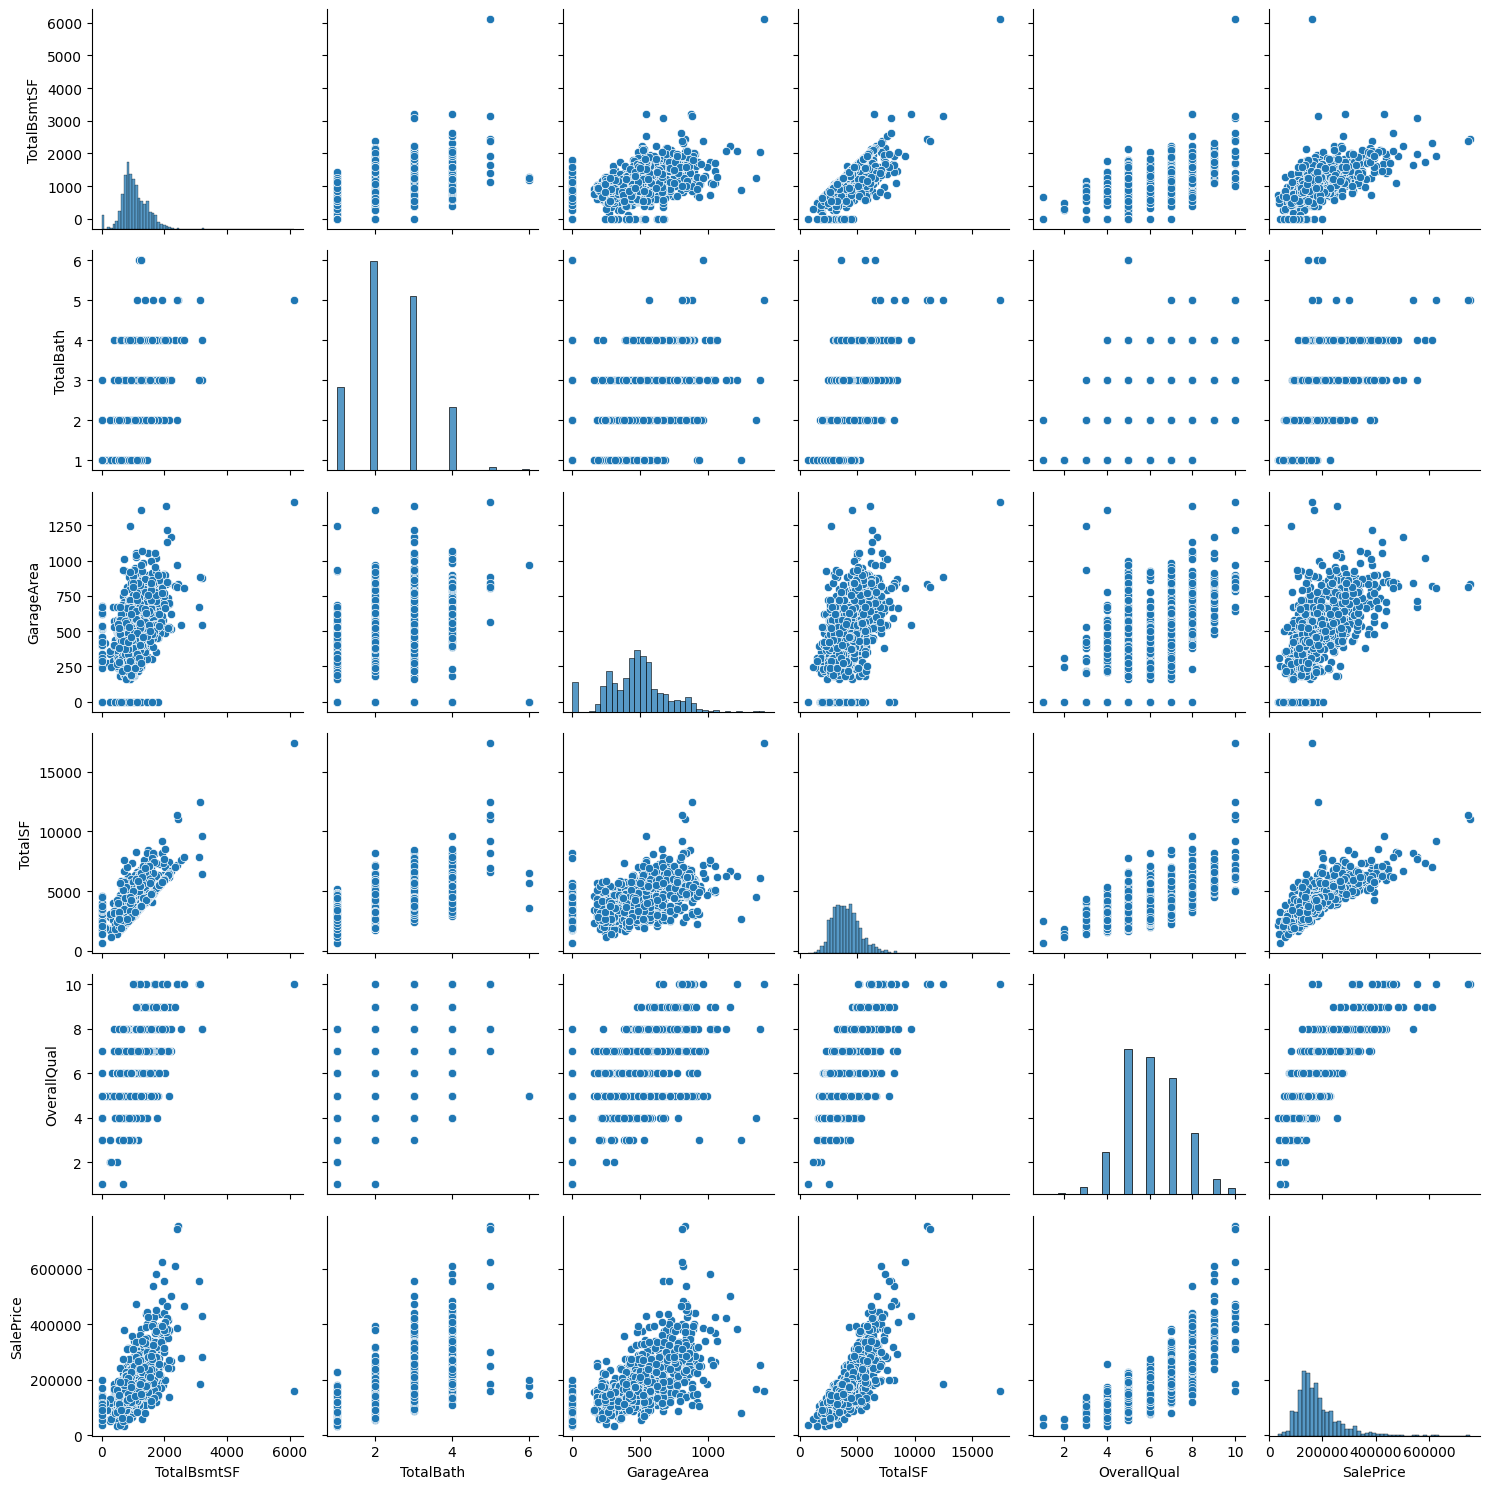

In [20]:
import warnings
warnings.filterwarnings("ignore",category=UserWarning)
%matplotlib inline
sns.pairplot(train_df)
plt.tight_layout()
plt.show()

In [21]:
corr_matrix=train_df.corr()
corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice      1.000000
OverallQual    0.790982
TotalSF        0.773909
GarageArea     0.623431
TotalBsmtSF    0.613581
TotalBath      0.613005
Name: SalePrice, dtype: float64

<Axes: >

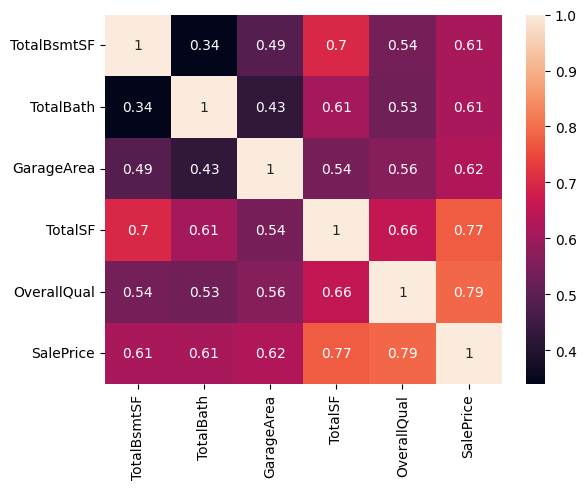

In [22]:
sns.heatmap(train_df.corr(),annot=True)

working with test dataframe

In [23]:
testdf=pd.read_csv("test.csv")

In [24]:
testdf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [25]:
req_tst=["GarageArea","SalePrice","OverallQual","TotalBsmtSF","1stFlrSF","2ndFlrSF","LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath", "HalfBath"] # Add 'FullBath' and 'HalfBath' to the list of required columns
selected_tst = traindf[req_tst]

selected_tst.loc[:,'TotalBath'] = (selected_tst['BsmtFullBath'].fillna(0) +
                                selected_tst['BsmtHalfBath'].fillna(0) + # Change the second 'BsmtFullBath' to 'BsmtHalfBath'
                                selected_tst['FullBath'].fillna(0) +
                                selected_tst['HalfBath'].fillna(0))

selected_tst.loc[:,'TotalSF'] = (selected_tst['TotalBsmtSF'].fillna(0)+
                                selected_tst['1stFlrSF'].fillna(0)+
                                selected_tst['2ndFlrSF'].fillna(0)+
                                selected_tst['LowQualFinSF'].fillna(0)+
                                selected_tst['GrLivArea'].fillna(0))

<ipython-input-25-99e0d17c6619>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_tst.loc[:,'TotalBath'] = (selected_tst['BsmtFullBath'].fillna(0) +
<ipython-input-25-99e0d17c6619>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_tst.loc[:,'TotalSF'] = (selected_tst['TotalBsmtSF'].fillna(0)+


In [26]:
selected_tst

,GarageArea,SalePrice,OverallQual,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,TotalBath,TotalSF
0,548,208500,7,856,856,854,0,1710,1,0,2,1,4,4276
1,460,181500,6,1262,1262,0,0,1262,0,1,2,0,3,3786
2,608,223500,7,920,920,866,0,1786,1,0,2,1,4,4492
3,642,140000,7,756,961,756,0,1717,1,0,1,0,2,4190
4,836,250000,8,1145,1145,1053,0,2198,1,0,2,1,4,5541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,460,175000,6,953,953,694,0,1647,0,0,2,1,3,4247
1456,500,210000,6,1542,2073,0,0,2073,1,0,2,0,3,5688
1457,252,266500,7,1152,1188,1152,0,2340,0,0,2,0,2,5832
1458,240,142125,5,1078,1078,0,0,1078,1,0,1,0,2,3234


In [27]:
test_df_uproc = selected_tst[['TotalBsmtSF', 'TotalBath', 'GarageArea', 'TotalSF', 'OverallQual']]

In [28]:
test_df_uproc

,TotalBsmtSF,TotalBath,GarageArea,TotalSF,OverallQual
0,856,4,548,4276,7
1,1262,3,460,3786,6
2,920,4,608,4492,7
3,756,2,642,4190,7
4,1145,4,836,5541,8
...,...,...,...,...,...
1455,953,3,460,4247,6
1456,1542,3,500,5688,6
1457,1152,2,252,5832,7
1458,1078,2,240,3234,5


In [29]:
test_df=test_df_uproc.fillna(test_df_uproc.mean())

model selection

In [30]:
#model=LinearRegression()
#model=DecisionTreeRegressor()
# Assuming you have your training data in variables X_train and y_train
# and test data in X_test and y_test
model=RandomForestRegressor()
model.fit(X_train,Y_train) # Changed Y_test to y_train

RandomForestRegressor()

In [31]:
y_train_pred=model.predict(X_train)

In [32]:
y_train_pred[:5]

array([148946.5 , 173763.  ,  88384.  , 165790.02, 136813.21])

In [33]:
some_data=housing.iloc[:5]
some_labels=housing_labels.iloc[:5]

In [34]:
proc_data=my_Pipeline.transform(some_data)

In [35]:
model.predict(proc_data)

array([148946.5 , 173763.  ,  88384.  , 165790.02, 136813.21])

In [36]:
list(some_labels)

[145000, 178000, 85000, 175000, 127000]

In [37]:
train_mse=mean_squared_error(Y_train,y_train_pred)

In [38]:
train_rmse=np.sqrt(train_mse)

In [39]:
print(f"Training MSE:{train_mse:.2f},Training RMSE:{train_rmse:.2f}")

Training MSE:169578035.80,Training RMSE:13022.21
